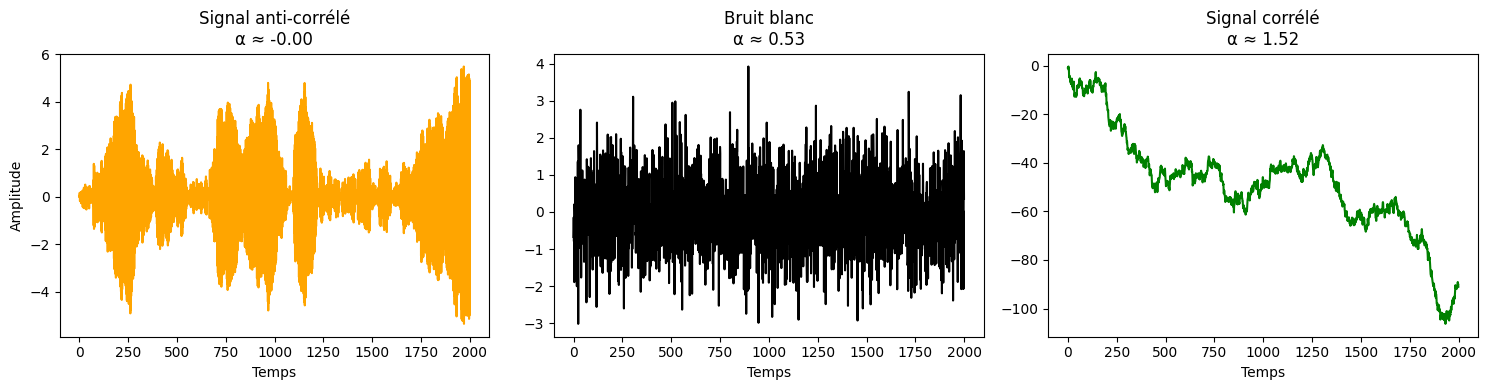

In [2]:
 import numpy as np
import matplotlib.pyplot as plt
from nolds import dfa

N = 2000
np.random.seed(42)

# 1. Signal anti-corrélé (α ≈ 0.2)
signal_anticorr = np.zeros(N)
noise1 = np.random.normal(0, 1, N)
for i in range(1, N):
    signal_anticorr[i] = -signal_anticorr[i - 1] + noise1[i] * 0.2

# 2. Bruit blanc (α ≈ 0.5)
signal_white = np.random.normal(0, 1, N)

# 3. Signal corrélé (α ≈ 1.0) : marche brownienne + faible tendance
signal_corr = np.cumsum(np.random.normal(0, 1, N)) + np.linspace(0, 5, N)

# Calculs des α
alpha_anticorr = dfa(signal_anticorr)
alpha_white = dfa(signal_white)
alpha_corr = dfa(signal_corr)

# Affichage
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(signal_anticorr, color='orange')
plt.title(f"Signal anti-corrélé\nα ≈ {alpha_anticorr:.2f}")
plt.xlabel("Temps"); plt.ylabel("Amplitude")

plt.subplot(1, 3, 2)
plt.plot(signal_white, color='black')
plt.title(f"Bruit blanc\nα ≈ {alpha_white:.2f}")
plt.xlabel("Temps")

plt.subplot(1, 3, 3)
plt.plot(signal_corr, color='green')
plt.title(f"Signal corrélé\nα ≈ {alpha_corr:.2f}")
plt.xlabel("Temps")

plt.tight_layout()
plt.savefig("DFA_signal_corrige.png", dpi=300)
plt.show()


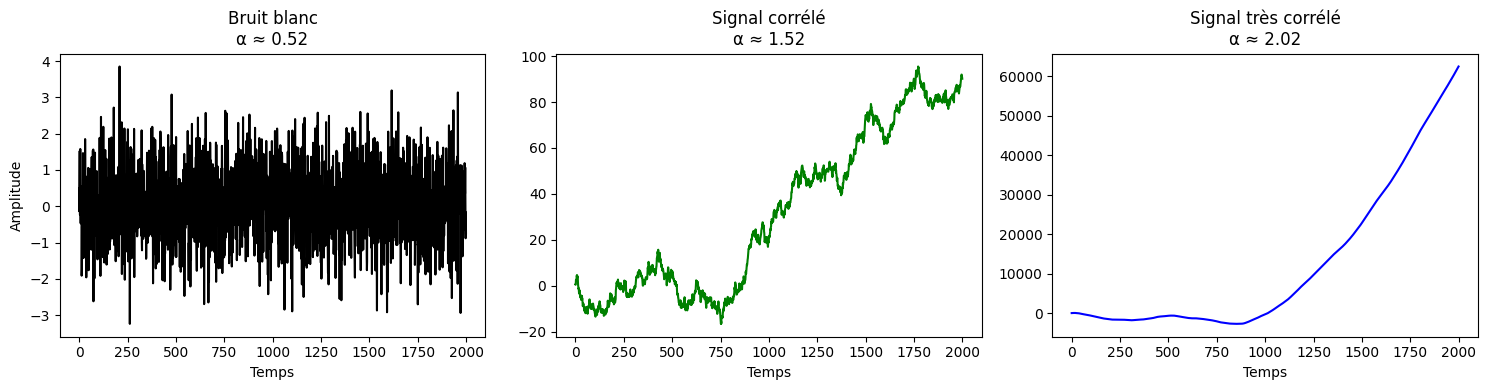

In [ ]:


# Taille des signaux
N = 2000
np.random.seed(42)

# 1. Bruit blanc (α ≈ 0.5)
signal_white = np.random.normal(0, 1, N)

# 2. Signal corrélé (α ≈ 1.0) : marche brownienne
signal_corr = np.cumsum(signal_white)

# 3. Signal très corrélé (α ≈ 1.5) : double intégration
signal_strong_corr = np.cumsum(signal_corr)

# Calculs DFA
alpha_white = dfa(signal_white)
alpha_corr = dfa(signal_corr)
alpha_strong_corr = dfa(signal_strong_corr)

# Affichage
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].plot(signal_white, color='black')
axs[0].set_title(f"Bruit blanc\nα ≈ {alpha_white:.2f}")
axs[0].set_xlabel("Temps")
axs[0].set_ylabel("Amplitude")

axs[1].plot(signal_corr, color='green')
axs[1].set_title(f"Signal corrélé\nα ≈ {alpha_corr:.2f}")
axs[1].set_xlabel("Temps")

axs[2].plot(signal_strong_corr, color='blue')
axs[2].set_title(f"Signal très corrélé\nα ≈ {alpha_strong_corr:.2f}")
axs[2].set_xlabel("Temps")

plt.tight_layout()
plt.savefig("dfa_0.5_1_1.5.png", dpi=300)
plt.show()


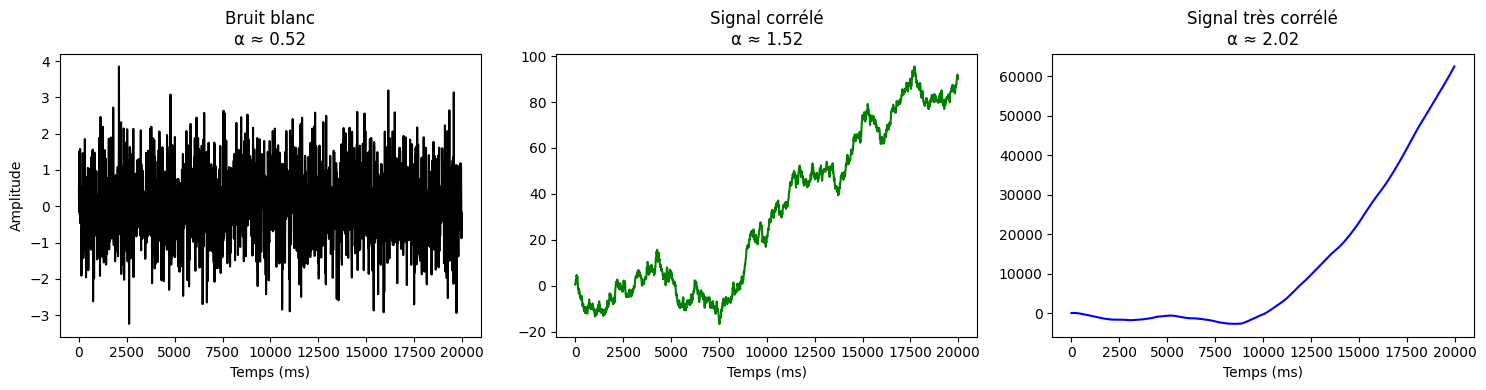

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nolds import dfa

# Taille des signaux
N = 2000
np.random.seed(42)

# 1. Bruit blanc
signal_white = np.random.normal(0, 1, N)

# 2. Signal corrélé
signal_corr = np.cumsum(signal_white)

# 3. Signal très corrélé
signal_strong_corr = np.cumsum(signal_corr)

# Calculs DFA
alpha_white = dfa(signal_white)
alpha_corr = dfa(signal_corr)
alpha_strong_corr = dfa(signal_strong_corr)

# Axe de temps en millisecondes
time_ms = np.arange(N) * 10  # 10 ms d'intervalle → 20 secondes au total

# Affichage
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].plot(time_ms, signal_white, color='black')
axs[0].set_title(f"Bruit blanc\nα ≈ {alpha_white:.2f}")
axs[0].set_xlabel("Temps (ms)")
axs[0].set_ylabel("Amplitude")

axs[1].plot(time_ms, signal_corr, color='green')
axs[1].set_title(f"Signal corrélé\nα ≈ {alpha_corr:.2f}")
axs[1].set_xlabel("Temps (ms)")

axs[2].plot(time_ms, signal_strong_corr, color='blue')
axs[2].set_title(f"Signal très corrélé\nα ≈ {alpha_strong_corr:.2f}")
axs[2].set_xlabel("Temps (ms)")

plt.tight_layout()
plt.savefig("dfa_millisecondes.png", dpi=300)
plt.show()


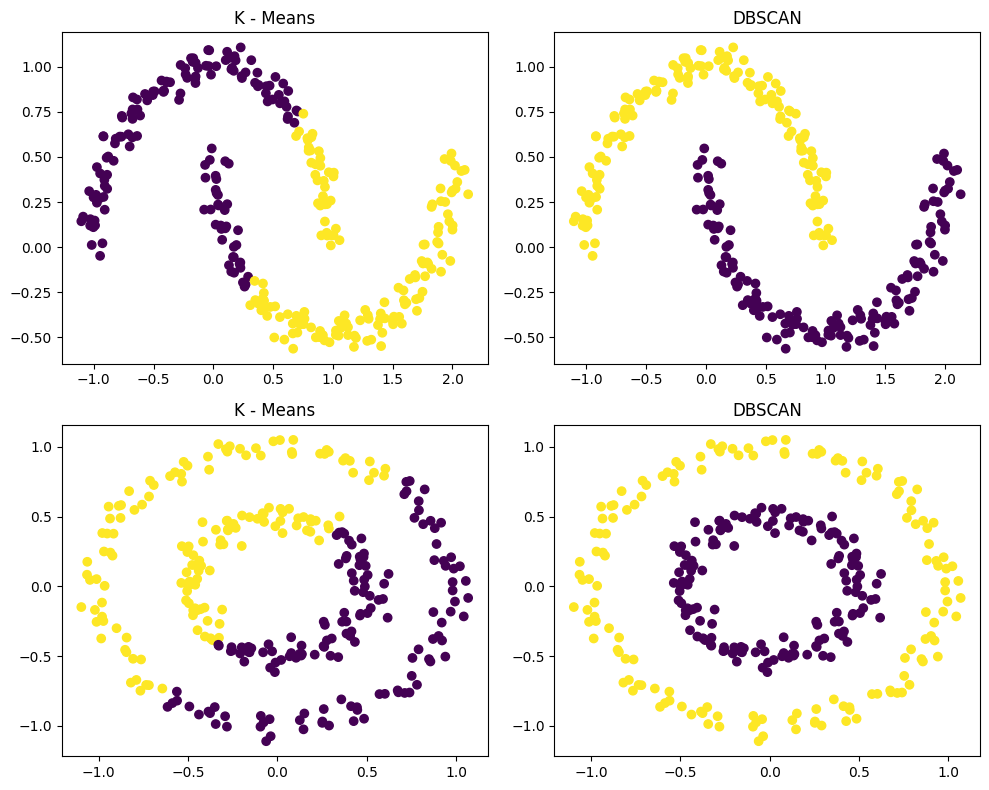

In [3]:
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

# Génération des datasets
moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
circles, _ = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)

# Clustering
kmeans_moons = KMeans(n_clusters=2).fit_predict(moons)
dbscan_moons = DBSCAN(eps=0.2, min_samples=5).fit_predict(moons)

kmeans_circles = KMeans(n_clusters=2).fit_predict(circles)
dbscan_circles = DBSCAN(eps=0.2, min_samples=5).fit_predict(circles)

# Affichage
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
titles = ["K - Means", "DBSCAN"]

axes[0, 0].scatter(moons[:, 0], moons[:, 1], c=kmeans_moons)
axes[0, 0].set_title("K - Means")
axes[0, 1].scatter(moons[:, 0], moons[:, 1], c=dbscan_moons)
axes[0, 1].set_title("DBSCAN")

axes[1, 0].scatter(circles[:, 0], circles[:, 1], c=kmeans_circles)
axes[1, 0].set_title("K - Means")
axes[1, 1].scatter(circles[:, 0], circles[:, 1], c=dbscan_circles)
axes[1, 1].set_title("DBSCAN")

plt.tight_layout()
plt.show()


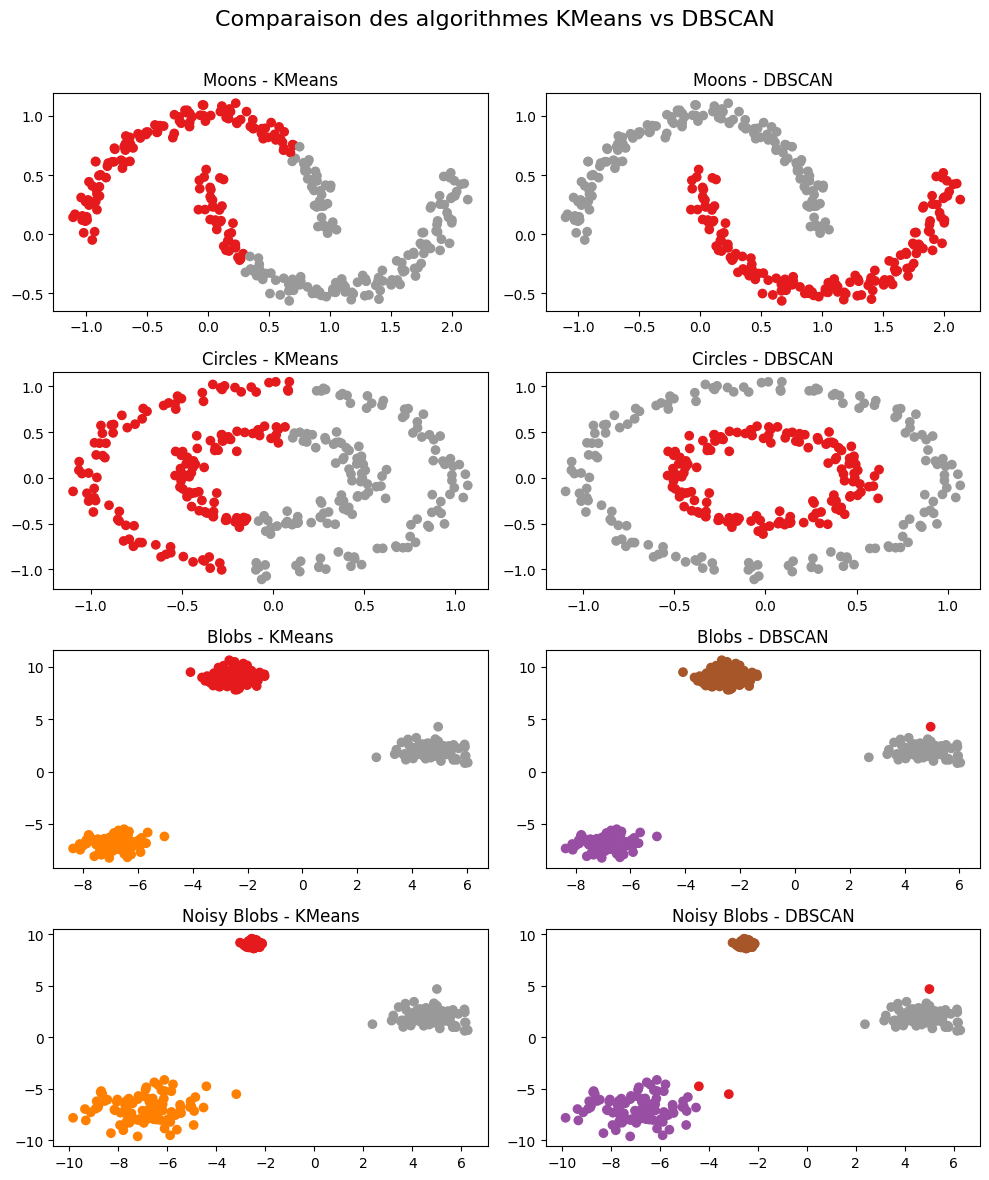

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.cluster import KMeans, DBSCAN
import numpy as np

# Génération des jeux de données
moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
circles, _ = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)
blobs, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)
noisy_blobs, _ = make_blobs(n_samples=300, centers=3, cluster_std=[0.2, 0.7, 1.2], random_state=42)

datasets = {
    "Moons": moons,
    "Circles": circles,
    "Blobs": blobs,
    "Noisy Blobs": noisy_blobs
}

# Paramètres DBSCAN ajustés pour chaque dataset
dbscan_params = {
    "Moons": {"eps": 0.2, "min_samples": 5},
    "Circles": {"eps": 0.2, "min_samples": 5},
    "Blobs": {"eps": 0.8, "min_samples": 5},
    "Noisy Blobs": {"eps": 1.0, "min_samples": 5},
}

# Création des graphiques
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
fig.suptitle("Comparaison des algorithmes KMeans vs DBSCAN", fontsize=16)

for i, (name, data) in enumerate(datasets.items()):
    # KMeans
    kmeans = KMeans(n_clusters=3 if name != "Moons" and name != "Circles" else 2, random_state=42)
    km_labels = kmeans.fit_predict(data)
    axes[i, 0].scatter(data[:, 0], data[:, 1], c=km_labels, cmap='Set1')
    axes[i, 0].set_title(f"{name} - KMeans")

    # DBSCAN
    db_params = dbscan_params[name]
    dbscan = DBSCAN(**db_params)
    db_labels = dbscan.fit_predict(data)
    axes[i, 1].scatter(data[:, 0], data[:, 1], c=db_labels, cmap='Set1')
    axes[i, 1].set_title(f"{name} - DBSCAN")

# Mise en page
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_86977/2237126262.py:63: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0.05, 1, 0.95])


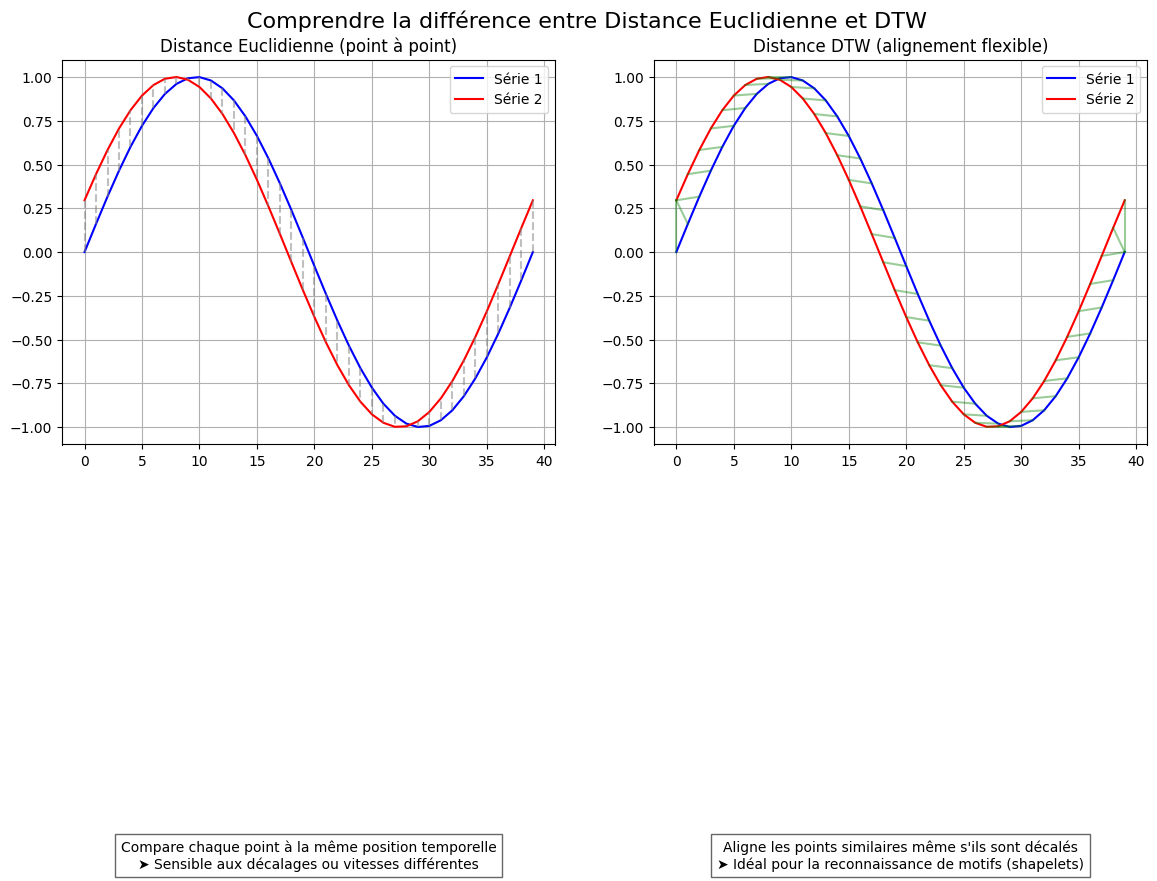

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- Générer deux signaux similaires mais décalés ---
x1 = np.linspace(0, 2*np.pi, 40)
x2 = np.linspace(0.3, 2*np.pi + 0.3, 40)

y1 = np.sin(x1)
y2 = np.sin(x2)

# --- Fonction DTW simple pour tracer les alignements ---
def simple_dtw(s1, s2):
    n, m = len(s1), len(s2)
    cost = np.full((n+1, m+1), np.inf)
    cost[0, 0] = 0
    for i in range(1, n+1):
        for j in range(1, m+1):
            dist = (s1[i-1] - s2[j-1])**2
            cost[i, j] = dist + min(cost[i-1, j], cost[i, j-1], cost[i-1, j-1])
    path = []
    i, j = n, m
    while i > 0 and j > 0:
        path.append((i-1, j-1))
        steps = np.array([cost[i-1, j-1], cost[i-1, j], cost[i, j-1]])
        move = np.argmin(steps)
        if move == 0:
            i, j = i-1, j-1
        elif move == 1:
            i -= 1
        else:
            j -= 1
    return path[::-1]

# --- Calcul de l'alignement DTW ---
path = simple_dtw(y1, y2)

# --- Créer la figure ---
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Comprendre la différence entre Distance Euclidienne et DTW", fontsize=16)

# --- Plot Euclidienne ---
axs[0].plot(y1, label="Série 1", color="blue")
axs[0].plot(y2, label="Série 2", color="red")
for i in range(len(y1)):
    axs[0].plot([i, i], [y1[i], y2[i]], color="gray", linestyle="--", alpha=0.5)
axs[0].set_title("Distance Euclidienne (point à point)", fontsize=12)
axs[0].legend()
axs[0].text(0.5, -1.1, "Compare chaque point à la même position temporelle\n➤ Sensible aux décalages ou vitesses différentes", 
            fontsize=10, transform=axs[0].transAxes, ha="center", bbox=dict(facecolor='white', alpha=0.6))
axs[0].grid(True)

# --- Plot DTW ---
axs[1].plot(y1, label="Série 1", color="blue")
axs[1].plot(y2, label="Série 2", color="red")
for i, j in path:
    axs[1].plot([i, j], [y1[i], y2[j]], color="green", alpha=0.4)
axs[1].set_title("Distance DTW (alignement flexible)", fontsize=12)
axs[1].legend()
axs[1].text(0.5, -1.1, "Aligne les points similaires même s'ils sont décalés\n➤ Idéal pour la reconnaissance de motifs (shapelets)", 
            fontsize=10, transform=axs[1].transAxes, ha="center", bbox=dict(facecolor='white', alpha=0.6))
axs[1].grid(True)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()
